In [9]:
import numpy as np
import pandas as pd
import requests
import json
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [10]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"


In [11]:
%cd /content/gdrive/My Drive/Kaggle


/content/gdrive/My Drive/Kaggle


In [12]:
%pwd

'/content/gdrive/My Drive/Kaggle'

In [4]:
!kaggle datasets download -d yamaerenay/spotify-dataset-19212020-160k-tracks

 96% 188M/195M [00:02<00:00, 65.1MB/s]
100% 195M/195M [00:02<00:00, 81.1MB/s]


In [7]:
%ls
!unzip \*.zip  && rm *.zip

artists.csv           INvideos.csv
CA_category_id.json   JP_category_id.json
CAvideos.csv          JPvideos.csv
data_by_artist_o.csv  kaggle.json
data_by_genres_o.csv  KR_category_id.json
data_by_year_o.csv    KRvideos.csv
data_o.csv            MX_category_id.json
DE_category_id.json   MXvideos.csv
DEvideos.csv          RU_category_id.json
dict_artists.json     RUvideos.csv
FR_category_id.json   spotify-dataset-19212020-160k-tracks.zip
FRvideos.csv          tracks.csv
GB_category_id.json   US_category_id.json
GBvideos.csv          USvideos.csv
IN_category_id.json   website_classification.csv
Archive:  spotify-dataset-19212020-160k-tracks.zip
replace artists.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [13]:
df = pd.read_csv('tracks.csv')
df

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,5rgu12WBIHQtvej2MdHSH0,云与海,50,258267,0,['阿YueYue'],['1QLBXKM5GCpyQQSVMNZqrZ'],2020-09-26,0.560,0.5180,0,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4
586668,0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,['ROLE MODEL'],['1dy5WNgIKQU6ezkpZs4y8z'],2020-10-21,0.765,0.6630,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4
586669,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,['FINNEAS'],['37M5pPGs6V1fchFJSgCguX'],2020-09-02,0.535,0.3140,7,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4
586670,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,"['Gentle Bones', 'Clara Benin']","['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...",2021-03-05,0.696,0.6150,10,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,4


In [15]:
import seaborn as sns
sns.set()


In [16]:
cols = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']

In [17]:
X = df[cols]
X

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence
0,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270
1,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550
2,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570
3,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970
4,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960
...,...,...,...,...,...,...,...,...,...,...
586667,0.560,0.5180,0,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110
586668,0.765,0.6630,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860
586669,0.535,0.3140,7,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663
586670,0.696,0.6150,10,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380


In [18]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [21]:
km = KMeans(
    n_clusters=25, init='k-means++',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=1
)
x = X.copy()

x['Cluster'] = km.fit_predict(X)

In [22]:
x

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,Cluster
0,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,1
1,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,6
2,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,6
3,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,4
4,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,14
...,...,...,...,...,...,...,...,...,...,...,...
586667,0.560,0.5180,0,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,10
586668,0.765,0.6630,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,22
586669,0.535,0.3140,7,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,21
586670,0.696,0.6150,10,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,0


In [30]:
# Clustering based on danceability:

danceable_cluster = x.sample(100)[['danceability', 'Cluster']]
danceable_cluster = danceable_cluster.reset_index()

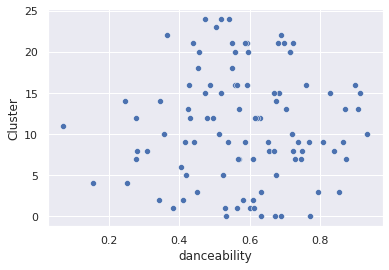

In [36]:
sns.scatterplot(data = danceable_cluster, x = 'danceability', y = 'Cluster')

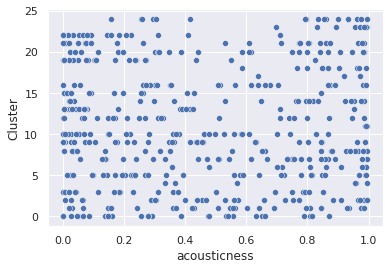

In [96]:
# Clustering based on acousticness:

accoustic_cluster = x.sample(500)[['acousticness', 'Cluster']]
accoustic_cluster = accoustic_cluster.reset_index()
sns.scatterplot(data = accoustic_cluster, x = 'acousticness', y = 'Cluster')

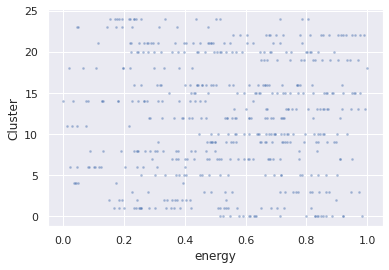

In [97]:
# Clustering based on energy:

energy_cluster = x.sample(500)[['energy', 'Cluster']]
energy_cluster = energy_cluster.reset_index()
sns.scatterplot(data = energy_cluster, x = 'energy', y = 'Cluster',palette=['red', 'blue', 'purple', 'green'], alpha=0.5, s=7)

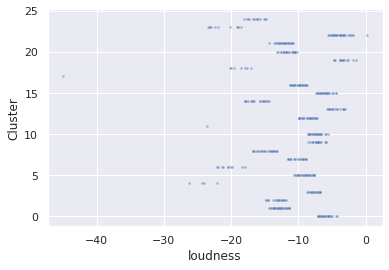

In [100]:
# Clustering based on loudness:

loudness_cluster = x.sample(500)[['loudness', 'Cluster']]
loudness_cluster = loudness_cluster.reset_index()
loudness_cluster
sns.scatterplot(data = loudness_cluster, x = 'loudness', y = 'Cluster', palette=['red', 'blue', 'purple', 'green'], alpha=0.5, s=7)

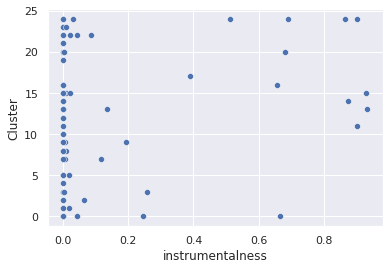

In [51]:
# Clustering based on instrumentalness:

instrumentalness_cluster = x.sample(100)[['instrumentalness', 'Cluster']]
instrumentalness_cluster = instrumentalness_cluster.reset_index()
sns.scatterplot(data = instrumentalness_cluster, x = 'instrumentalness', y = 'Cluster')

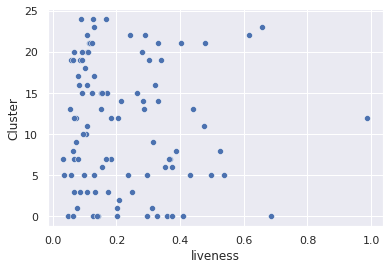

In [53]:
# Clustering based on liveness:

liveness_cluster = x.sample(100)[['liveness', 'Cluster']]
liveness_cluster = liveness_cluster.reset_index()
sns.scatterplot(data = liveness_cluster, x = 'liveness', y = 'Cluster')

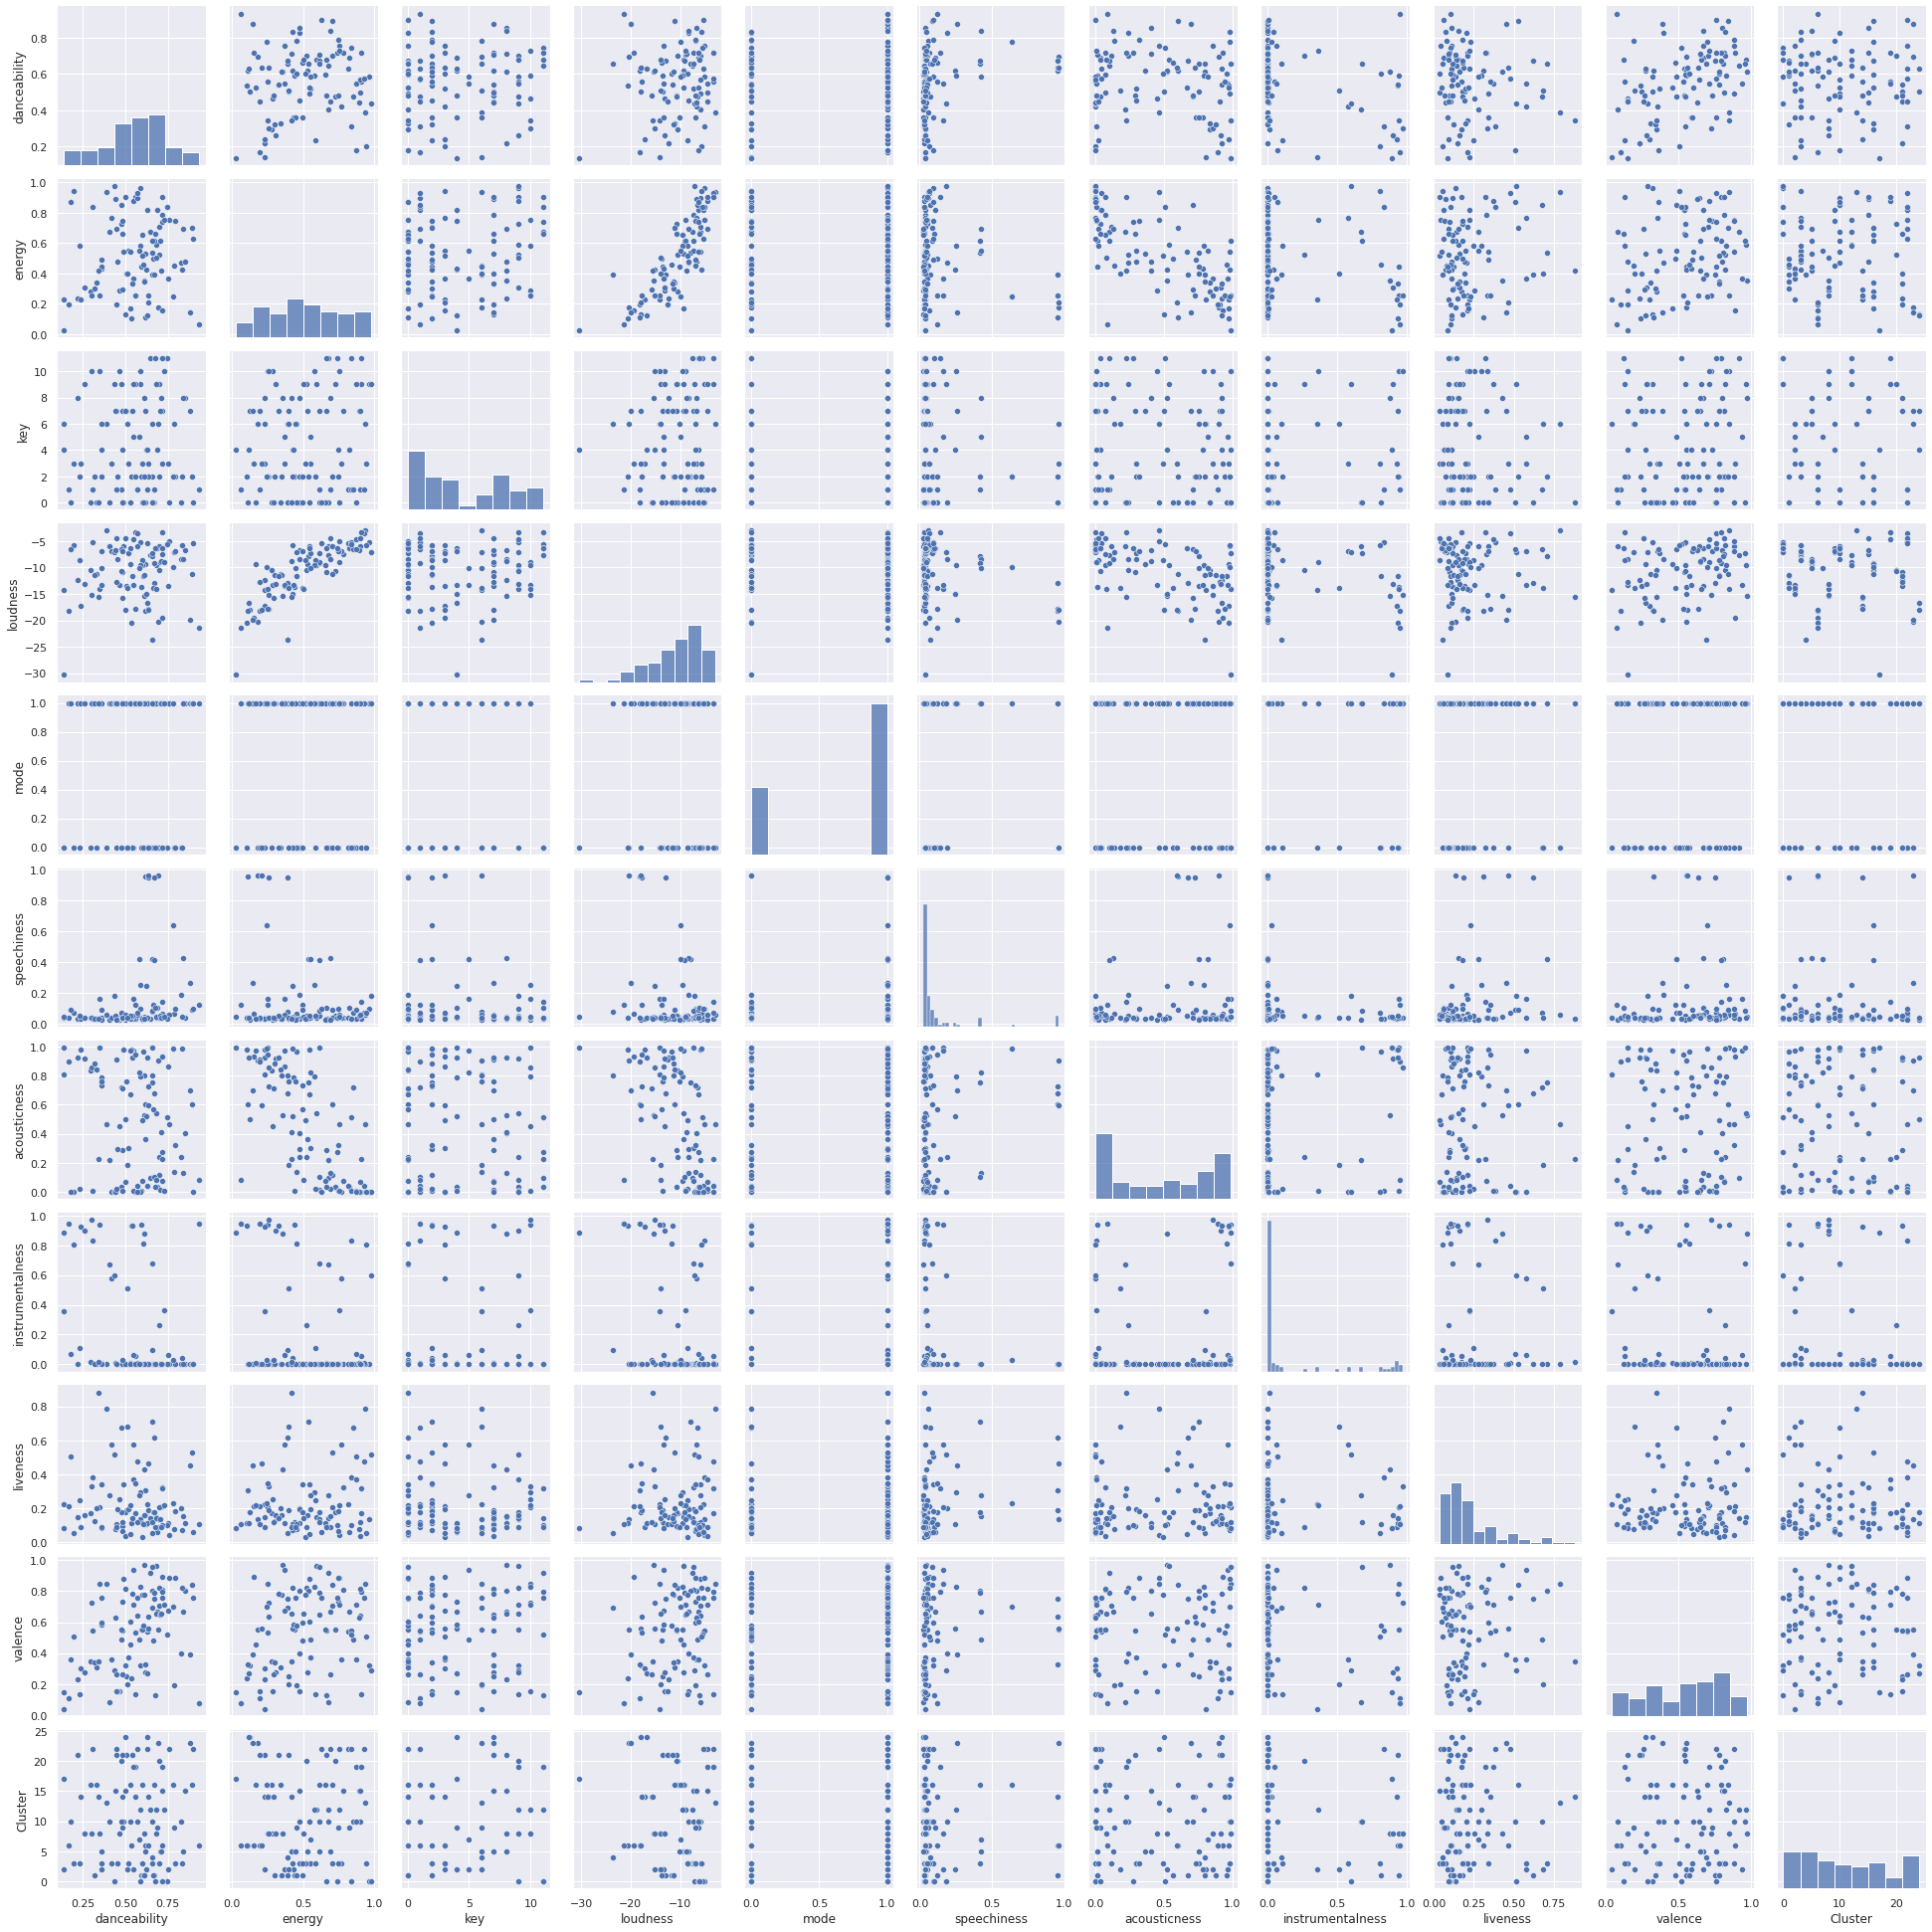

In [59]:
import matplotlib.pyplot as plt
sns.pairplot(x.sample(100))
plt.savefig('/content/gdrive/My Drive/Kaggle/spotifykmeans.png')



In [64]:
%cd /content/gdrive/My Drive/Kaggle

genres = pd.read_csv('data_by_genres_o.csv')

/content/gdrive/My Drive/Kaggle


In [65]:
genres

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
0,1,21st century classical,0.979333,0.162883,1.602977e+05,0.071317,0.606834,0.361600,-31.514333,0.040567,75.336500,0.103783,27.833333,6
1,1,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.500000,5
2,1,8-bit,0.762000,0.712000,1.151770e+05,0.818000,0.876000,0.126000,-9.180000,0.047000,133.444000,0.975000,48.000000,7
3,1,[],0.651417,0.529093,2.328809e+05,0.419146,0.205309,0.218696,-12.288965,0.107872,112.857352,0.513604,20.859882,7
4,1,a cappella,0.676557,0.538961,1.906285e+05,0.316434,0.003003,0.172254,-12.479387,0.082851,112.110362,0.448249,45.820071,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2968,1,zolo,0.222625,0.547082,2.580991e+05,0.610240,0.143872,0.204206,-11.295878,0.061088,125.494919,0.596155,33.778943,9
2969,0,zouglou,0.161000,0.863000,2.063200e+05,0.909000,0.000000,0.108000,-5.985000,0.081300,119.038000,0.845000,58.000000,7
2970,1,zouk,0.263261,0.748889,3.060728e+05,0.622444,0.257227,0.089678,-10.289222,0.038778,101.965222,0.824111,46.666667,5
2971,0,zurich indie,0.993000,0.705667,1.984173e+05,0.172667,0.468633,0.179667,-11.453333,0.348667,91.278000,0.739000,0.000000,7


In [68]:
top10_genres = genres.nlargest(10, 'popularity')

In [69]:
top10_genres

,mode,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key
237,1,basshall,0.213167,0.81800,169799.166667,0.630167,0.000020,0.081067,-6.627833,0.134833,115.092500,0.588667,80.666667,2
2533,1,south african house,0.043833,0.84700,311854.333333,0.562333,0.130339,0.075133,-7.719000,0.050733,123.676333,0.834333,80.000000,1
2755,1,trap venezolano,0.044600,0.87700,231848.000000,0.777000,0.000035,0.086300,-4.246000,0.117000,102.020000,0.706000,80.000000,1
2778,0,turkish edm,0.008290,0.69800,186700.000000,0.719000,0.000004,0.326000,-4.923000,0.045500,120.062000,0.364000,80.000000,0
46,0,alberta hip hop,0.330000,0.88500,144000.000000,0.685000,0.000000,0.148000,-6.429000,0.062700,99.954000,0.937000,78.500000,11
536,0,chinese electropop,0.002570,0.66000,217088.000000,0.787000,0.000000,0.323000,-4.592000,0.032000,142.018000,0.199000,78.500000,1
37,0,afroswing,0.318450,0.71175,179995.375000,0.580187,0.000258,0.189950,-7.016687,0.195563,83.250125,0.676625,77.312500,11
31,0,afro soul,0.006270,0.76600,202627.000000,0.873000,0.000000,0.076400,-6.381000,0.143000,126.988000,0.743000,77.000000,11
575,1,circuit,0.009030,0.74500,189818.000000,0.972000,0.465000,0.297000,-3.506000,0.077400,128.031000,0.556000,77.000000,7
1239,1,guaracha,0.009030,0.74500,189818.000000,0.972000,0.465000,0.297000,-3.506000,0.077400,128.031000,0.556000,77.000000,7


ValueError: ignored

In [78]:
cols = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']
genre_model=genres[cols]
km = KMeans(
    n_clusters=25, init='k-means++',
    n_init=10, max_iter=300, 
    tol=1e-04, random_state=1
)
g = genre_model.copy()

g['Cluster'] = km.fit_predict(genre_model)

In [79]:
g

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,Cluster
0,0.162883,0.071317,6,-31.514333,1,0.040567,0.979333,0.606834,0.361600,0.103783,17
1,0.299333,0.450678,5,-16.854000,1,0.076817,0.494780,0.477762,0.131000,0.221750,21
2,0.712000,0.818000,7,-9.180000,1,0.047000,0.762000,0.876000,0.126000,0.975000,15
3,0.529093,0.419146,7,-12.288965,1,0.107872,0.651417,0.205309,0.218696,0.513604,19
4,0.538961,0.316434,7,-12.479387,1,0.082851,0.676557,0.003003,0.172254,0.448249,19
...,...,...,...,...,...,...,...,...,...,...,...
2968,0.547082,0.610240,9,-11.295878,1,0.061088,0.222625,0.143872,0.204206,0.596155,10
2969,0.863000,0.909000,7,-5.985000,0,0.081300,0.161000,0.000000,0.108000,0.845000,8
2970,0.748889,0.622444,5,-10.289222,1,0.038778,0.263261,0.257227,0.089678,0.824111,14
2971,0.705667,0.172667,7,-11.453333,0,0.348667,0.993000,0.468633,0.179667,0.739000,19


In [81]:
g['Genre'] = genres['genres']

In [102]:
g

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,Cluster,Genre
0,0.162883,0.071317,6,-31.514333,1,0.040567,0.979333,0.606834,0.361600,0.103783,17,21st century classical
1,0.299333,0.450678,5,-16.854000,1,0.076817,0.494780,0.477762,0.131000,0.221750,21,432hz
2,0.712000,0.818000,7,-9.180000,1,0.047000,0.762000,0.876000,0.126000,0.975000,15,8-bit
3,0.529093,0.419146,7,-12.288965,1,0.107872,0.651417,0.205309,0.218696,0.513604,19,[]
4,0.538961,0.316434,7,-12.479387,1,0.082851,0.676557,0.003003,0.172254,0.448249,19,a cappella
...,...,...,...,...,...,...,...,...,...,...,...,...
2968,0.547082,0.610240,9,-11.295878,1,0.061088,0.222625,0.143872,0.204206,0.596155,10,zolo
2969,0.863000,0.909000,7,-5.985000,0,0.081300,0.161000,0.000000,0.108000,0.845000,8,zouglou
2970,0.748889,0.622444,5,-10.289222,1,0.038778,0.263261,0.257227,0.089678,0.824111,14,zouk
2971,0.705667,0.172667,7,-11.453333,0,0.348667,0.993000,0.468633,0.179667,0.739000,19,zurich indie
